# Introduction

Working with a LEGO dataset.

Problem statements:
<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
colors = pd.read_csv('colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
colors['name'].nunique()

135

In [4]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [5]:
colors.is_trans.value_counts()

,count
is_trans,
f,107
t,28


###Understanding LEGO Themes vs. LEGO Sets

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

In [6]:
sets=pd.read_csv("sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


 In which year were the first LEGO sets released and what were these sets called?

In [7]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


 How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [8]:
sets[sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


 Find the top 5 LEGO sets with the most number of parts.

In [9]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [10]:
sets_by_year=sets.groupby('year').count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [11]:
sets_by_year['set_num'].head()

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28


 Show the number of LEGO releases on a line chart using Matplotlib.

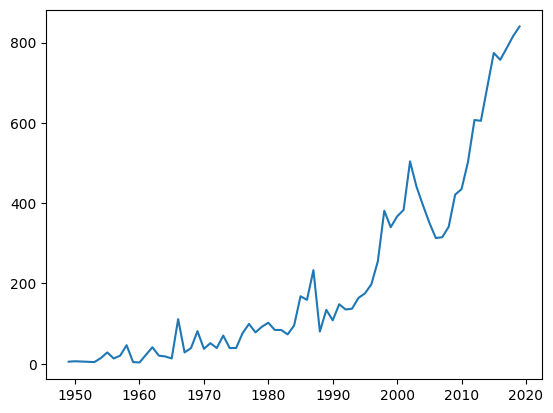

In [12]:
plt.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2])

### Aggregating Data with the Python .agg() Function

In [13]:
themes_by_year=sets.groupby('year').agg({'theme_id':pd.Series.nunique})

In [14]:
themes_by_year.rename(columns={'theme_id': 'num_themes'},inplace=True)
themes_by_year.tail()

,num_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


Plot the number of themes released by year on a line chart

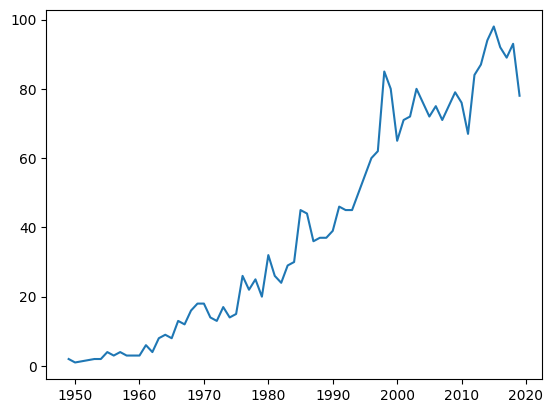

In [15]:
plt.plot(themes_by_year.index[:-2], themes_by_year.num_themes[:-2])

### Line Charts with Two Seperate Axes

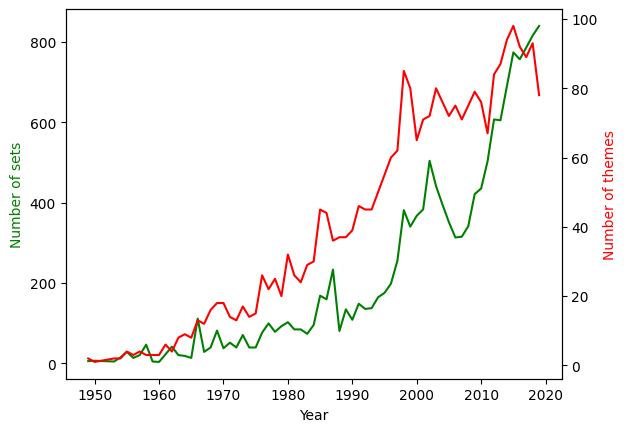

In [16]:
ax1=plt.gca() #gets the current axis
ax2=ax1.twinx() #create another axis that shares same x-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets',color='g')
ax2.set_ylabel('Number of themes',color='r')
ax1.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color='g')
ax2.plot(themes_by_year.index[:-2],themes_by_year.num_themes[:-2],'r')


### Scatter Plots in Matplotlib

 Has the size and complexity of LEGO sets increased over time based on the number of parts?

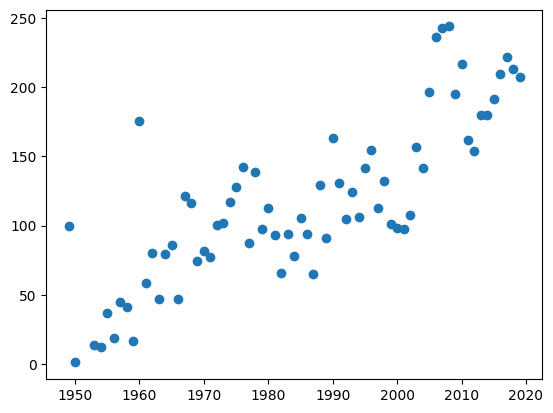

In [17]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
plt.scatter(parts_per_set.index[:-2],parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

In [18]:
themes=pd.read_csv('themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [19]:
themes[themes.name=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [20]:
sets[sets.theme_id==18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


### Merging (i.e., Combining) DataFrames based on a Key


In [21]:
set_theme_count=sets['theme_id'].value_counts()

In [22]:
set_theme_count=pd.DataFrame({'id': set_theme_count.index, 'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [23]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

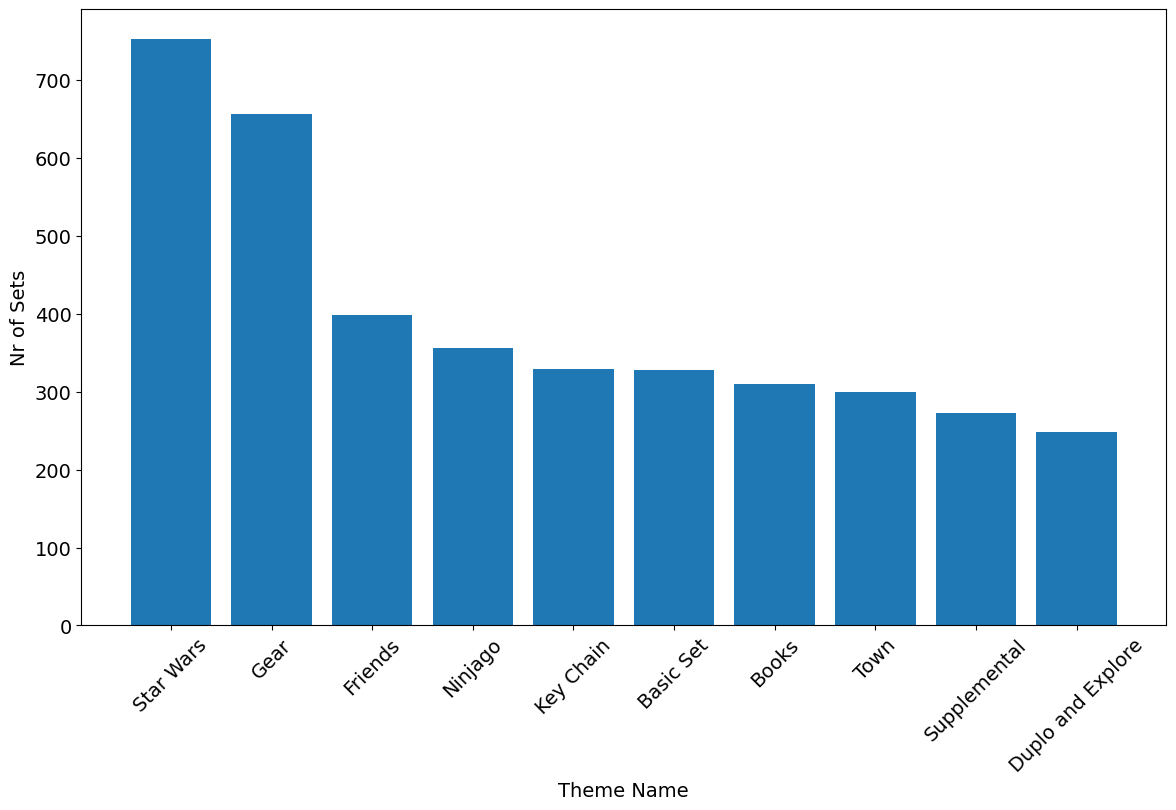

In [24]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])